## [Task 1] Item-Based

<br />

I am going to do item-based recommendations by using data of travelers.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Prepare concise dataset of travelers

travelers = np.array([[1, 2, 4, 3],
                      [1, 1, 2, 4],
                      [3, 5, 2, 2],
                      [3, 4, 2, 3],
                      [3, 3, 0, 4],
                      [3, 3, 1, 4]])

# Data of a target user
target = np.array([1, 0, 0, 0])

In [3]:
# Create a dataframe

columns = ["Hawaii", "Guam", "London", "NewYork"]

df = pd.DataFrame(travelers, columns=columns)

In [4]:
# Check

df

,Hawaii,Guam,London,NewYork
0,1,2,4,3
1,1,1,2,4
2,3,5,2,2
3,3,4,2,3
4,3,3,0,4
5,3,3,1,4


### Similarity Matrix between Items

In [5]:
# Define of cosine similarity


def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [6]:
# Create lists of each country

countries_list = []
for i, name in enumerate(columns):
    name = []
    for j in range(len(travelers)):
        name.append(travelers[j][i])
    countries_list.append(name)

coutries_array = np.array(countries_list)

In [7]:
# Check

coutries_array

array([[1, 1, 3, 3, 3, 3],
       [2, 1, 5, 4, 3, 3],
       [4, 2, 2, 2, 0, 1],
       [3, 4, 2, 3, 4, 4]])

In [8]:
# Compute cosine similarities

cos_sim_list = []
for i in range(len(coutries_array)):
    temporary_list = []
    for j in range(len(coutries_array)):
        temporary_list.append(cos_sim(coutries_array[i], coutries_array[j]))
    cos_sim_list.append(temporary_list)

cos_sim_array = np.array(cos_sim_list)

In [9]:
# Check

cos_sim_array

array([[1.        , 0.97332853, 0.63259899, 0.89190174],
       [0.97332853, 1.        , 0.71956944, 0.83666003],
       [0.63259899, 0.71956944, 1.        , 0.75462449],
       [0.89190174, 0.83666003, 0.75462449, 1.        ]])

In [10]:
# Create a dataframe

df_sim_matrix = pd.DataFrame(cos_sim_array, index=columns, columns=columns)

In [11]:
# Check

df_sim_matrix

,Hawaii,Guam,London,NewYork
Hawaii,1.000000,0.973329,0.632599,0.891902
Guam,0.973329,1.000000,0.719569,0.836660
London,0.632599,0.719569,1.000000,0.754624
NewYork,0.891902,0.836660,0.754624,1.000000


### Recommend by Inner Products of User's Vector and Similarity Matrix

In [12]:
# Compute inner products

inner_products = np.dot(cos_sim_array, target)

In [13]:
# Check

inner_products

array([1.        , 0.97332853, 0.63259899, 0.89190174])

In [14]:
# Output the recommendation

# Change 1 to -1
new_inner_products = np.where(
    inner_products == np.amax(inner_products), -1, inner_products)

# Get an index of max values
index = np.argmax(new_inner_products)

# Output
columns[index]

'Guam'

    - I recommend Guam as next destination to the target user by the above result.

## [Task 2] User-Based

<br />

I am going to recommend a book to the following user1 by the following data.

In [15]:
# Prepare concise dataset of consumers who bought books

readers = np.array([[2, 2, 4, np.nan, np.nan],
                    [1, 1, 2, 4, 3],
                    [0, 5, 2, 2, 5],
                    [2, 4, 2, 3, 4],
                    [1, 3, 0, 4, 1]])

In [16]:
# Create a dataframe

columns2 = ["ゼロから作るDeepLearning", "Python機械学習プログラミング",
            "ゼロから作るDeepLearning-自然言語処理編-", "はじめてのパターン認識", "これからの強化学習"]

rows = ["user1", "user2", "user3", "user4", "user5"]

df2 = pd.DataFrame(readers, index=rows, columns=columns2)

In [17]:
# Check

df2

,ゼロから作るDeepLearning,Python機械学習プログラミング,ゼロから作るDeepLearning-自然言語処理編-,はじめてのパターン認識,これからの強化学習
user1,2.0,2.0,4.0,NaN,NaN
user2,1.0,1.0,2.0,4.0,3.0
user3,0.0,5.0,2.0,2.0,5.0
user4,2.0,4.0,2.0,3.0,4.0
user5,1.0,3.0,0.0,4.0,1.0


### Correlation Matrix per Each User

In [18]:
# Recreate the dataframe for users

df2_users = pd.DataFrame(readers, index=columns2, columns=rows)

In [19]:
new_df2_users = df2_users.dropna(axis=0, how="any")

In [20]:
# Check

new_df2_users

,user1,user2,user3,user4,user5
Python機械学習プログラミング,1.0,1.0,2.0,4.0,3.0
ゼロから作るDeepLearning-自然言語処理編-,0.0,5.0,2.0,2.0,5.0
はじめてのパターン認識,2.0,4.0,2.0,3.0,4.0
これからの強化学習,1.0,3.0,0.0,4.0,1.0


In [21]:
# Correlation matrix

df_corr = new_df2_users.corr(method='pearson')

In [22]:
# Check

df_corr

,user1,user2,user3,user4,user5
user1,1.000000,-0.239046,0.000000,0.426401,-0.239046
user2,-0.239046,1.000000,0.097590,-0.866400,0.542857
user3,0.000000,0.097590,1.000000,-0.522233,0.878310
user4,0.426401,-0.866400,-0.522233,1.000000,-0.866400
user5,-0.239046,0.542857,0.878310,-0.866400,1.000000


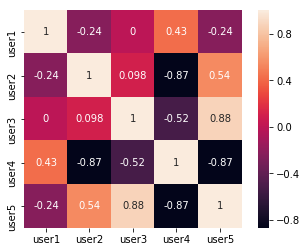

In [23]:
# Display the heatmap

plt.figure()
sns.heatmap(df_corr, annot=True, square=True)

plt.show()

    - I recommend products that the user4 bought to the user1 by the above result.